In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('imdb_top_1000_clean.csv')

In [26]:
df

,Unnamed: 0,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953.0,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


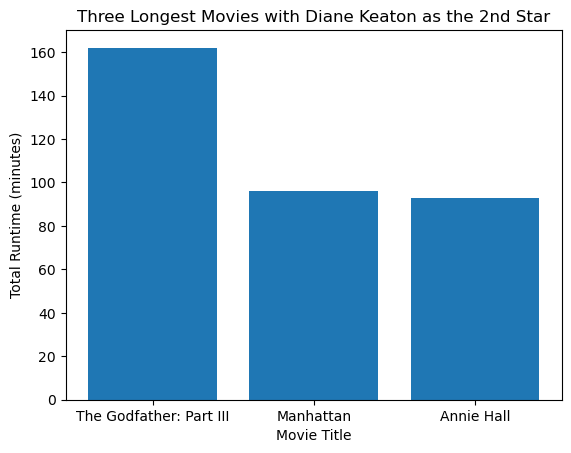

In [3]:
# The three longest movies with Diane Keaton as second star

# Filter movies where Diane Keaton is the 2nd star
dk_movies = df[df['Star2'] == 'Diane Keaton']

# Group by movie and calculate total length of movies
runtime_dk_movies = dk_movies.groupby('Series_Title')['Runtime'].sum()

# Find the 3 longest movies
dk_three_longest_movies = runtime_dk_movies.nlargest(3)

# Create a bar chart
plt.bar(dk_three_longest_movies.index, dk_three_longest_movies)

plt.xlabel('Movie Title')
plt.ylabel('Total Runtime (minutes)')
plt.title('Three Longest Movies with Diane Keaton as the 2nd Star')

plt.show()

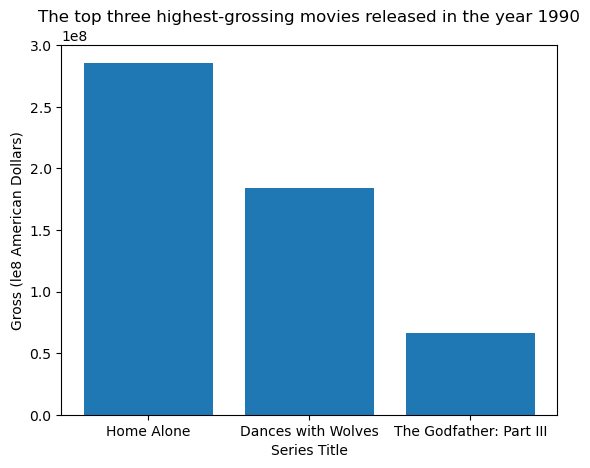

In [28]:
# The top three highest-grossing movies released in the year 1990

# Filter movies released in the year 1990 and sort by 'Gross' in descending order
sets_year_1990 = df[df['Released_Year'] == 1990][['Series_Title', 'Gross', 'Released_Year']].sort_values(by='Gross', ascending=False)

# Find the top 3
top_most_expensive_movies = sets_year_1990.head(3)

# Create a bar chart
plt.bar(top_most_expensive_movies['Series_Title'], top_most_expensive_movies['Gross'])

plt.xlabel('Series Title')
plt.ylabel('Gross (le8 American Dollars)')
plt.title('The top three highest-grossing movies released in the year 1990')

plt.show()

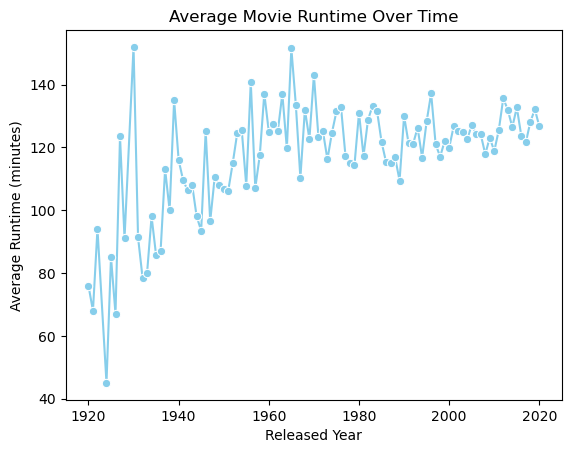

In [23]:
# Are the average runtime increasing

# Group by released year and calculate the average runtime
avg_runtime = df.groupby('Released_Year')['Runtime'].mean().reset_index()

# Create a line chart
sns.lineplot(data=avg_runtime, x='Released_Year', y='Runtime', marker='o', color='skyblue')
plt.title('Average Movie Runtime Over Time')
plt.xlabel('Released Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()